In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
%matplotlib inline
colors = ['#000000', '#00fc54', '#fc0400']

0
1
2


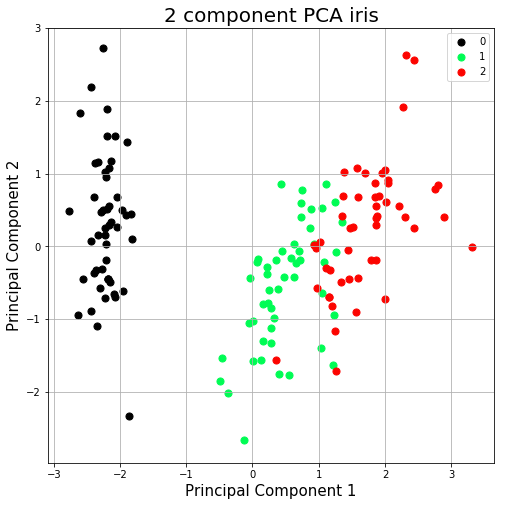

variance for component1: 0.7277045209380135,
variance for component2: 0.2303052326768062,
total_variance: 0.9580097536148198


In [28]:
iris = datasets.load_iris()
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
x = iris.data
x = pd.DataFrame(x)
y = pd.DataFrame({'Target':iris.target})

x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA iris', fontsize = 20)
# targets = list(set(list(y[1:])))
targets = list(set(iris.target))
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()
# plt.savefig('pca_'+name+'.png')
variance = pca.explained_variance_ratio_
var_com1 = variance[0]
var_com2 = variance[1]
total = var_com1 + var_com2
print(f'variance for component1: {var_com1},\nvariance for component2: {var_com2},\ntotal_variance: {total}')
